# LINEAR REGRESSION

#### Import Library
#### 1. Lakukan langkah yang sama seperti minggu sebelumnya untuk meng-import library Numpy dan Pandas, pylab, matplotlib.pyplot.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Import Data
#### 2. Gunakan dataset FuelConsumptionCo2.csv dan masukkan ke dalam dataframe menggunakan Pandas. Berikan nama df
#### 3. Tampilkan informasi dataset dan isi data.

#### Menampilkan Statistik Data
#### 4. Membaca data :

In [2]:
df = pd.read_csv(r"D:\SEMESTER 4\IS411 Data Modelling\LAB\IS411_C-HY_00000054804_Christopher Darren_Week-13\FuelConsumptionCo2.csv")

# melihat dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### 5. Eksplorasi deskriptif data yang diunduh.

In [3]:
# merangkum data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


#### 7. Fitur-fitur tersebut dapat diplot sebagai berikut:

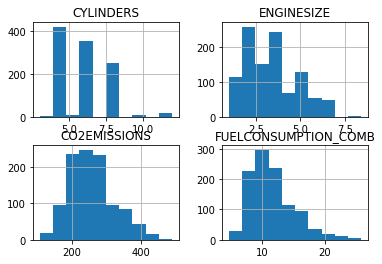

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

#### 8. Plot fitur-fitur vs emisi dapat dibuat dan dapat dilihat linearitas hubungannya.

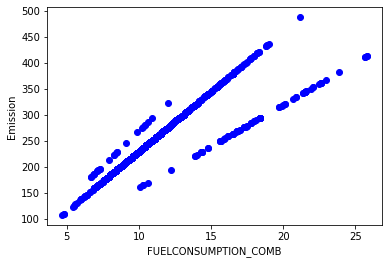

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

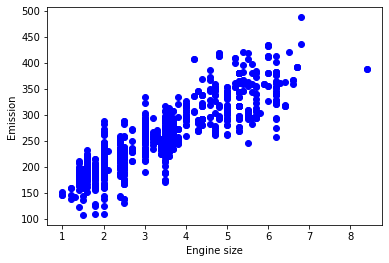

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Challenge
#### 1. Plot CYLINDER vs the Emission, untuk melihat hubungan linearnya:

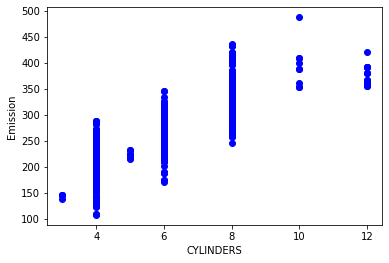

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

#### Pembuatan dataset pelatihan dan pengujian

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### 9. Distribusi Data Pelatihan.

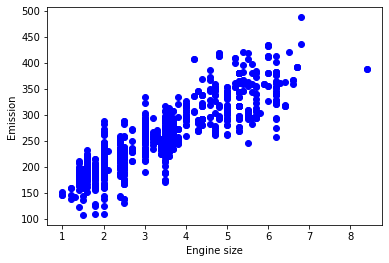

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Pemodelan
#### 10. Menggunakan sklearn package untuk memodelkan data.

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

C:\Users\Darren\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Coefficients:  [[39.02518705]]
Intercept:  [125.14710453]


#### Plot output model
#### 11. Plotting garis yang mencocoki terhadap data:

Text(0, 0.5, 'Emission')

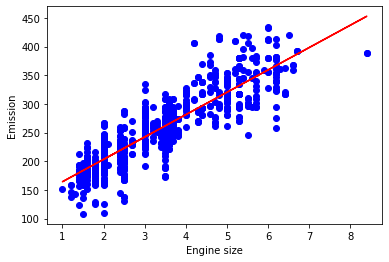

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluasi

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_= regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 24.65
Residual sum of squares (MSE): 1031.72
R2-score: 0.69


#### Model Regresi Variabel Jamak
#### 1. Buatlah seperti langkah no. 9 untuk variabel – variabel: Engine size, Fuel Consumptions, dan Cylinders!
#### 2. Lakukan langkah pemodelan seperti no.10 dengan menggunakan 3 variabel tersebut sebagai data X!
#### 3. Lakukan sampai tahap evaluasinya!

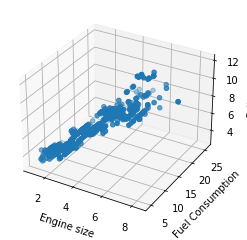

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the data for the three variables
engine_size = cdf.ENGINESIZE
fuel_consumption = cdf.FUELCONSUMPTION_COMB
cylinders = cdf.CYLINDERS

# Plot the data in 3D
ax.scatter(engine_size, fuel_consumption, cylinders)

# Set the labels for each axis
ax.set_xlabel("Engine size")
ax.set_ylabel("Fuel Consumption")
ax.set_zlabel("Cylinders")

plt.show()

#### challenge model

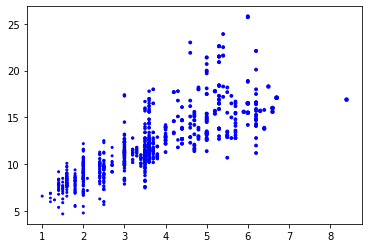

In [15]:
plt.scatter(train.ENGINESIZE, train.FUELCONSUMPTION_COMB, train.CYLINDERS, color='blue')
plt.show()

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['ENGINESIZE','CYLINDERS']])
train_y1 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
regr.fit(train_x1, train_y1)
# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[1.82722556 0.18148429]]
Intercept:  [4.44426533]


#### Visualize

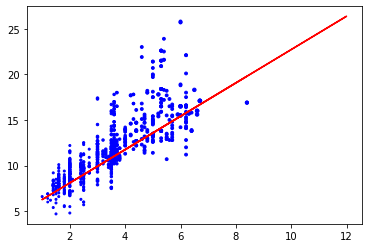

In [17]:
plt.scatter(train.ENGINESIZE, train.FUELCONSUMPTION_COMB, train.CYLINDERS, color='blue')
plt.plot(train_x1, regr.coef_[0][0]*train_x1 + regr.intercept_[0], '-r')
#plt.xlabel("Engine size")
#plt.ylabel("Emission")
plt.show()

#### challenge evaluation

In [18]:
from sklearn.metrics import r2_score

test_x1 = np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_COMB']])
test_y1= np.asanyarray(test[['CYLINDERS']])
test_y_= regr.predict(test_x1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y1))

Mean absolute error: 6.93
Residual sum of squares (MSE): 50.68
R2-score: -3.91


In [19]:
!jupyter nbconvert --to html "./00000054804_Christopher Darren_Week13_ASINKRON.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./00000054804_Christopher Darren_Week13_ASINKRON.ipynb to html
[NbConvertApp] Writing 801481 bytes to 00000054804_Christopher Darren_Week13_ASINKRON.html
